In [1]:
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_csv('https://covid19.isciii.es/resources/serie_historica_acumulados.csv', encoding='mac-roman', skipfooter=3, engine='python', parse_dates=['FECHA'], date_parser=lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [3]:
df.fillna(0, inplace=True)

In [4]:
df['Activos'] = df['CASOS'] - (df['Fallecidos'] + df['Recuperados'])

In [5]:
df

,CCAA,FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados,Activos
0,AN,2020-02-20,0.0,0.0,0.0,0.0,0.0,0.0
1,AR,2020-02-20,0.0,0.0,0.0,0.0,0.0,0.0
2,AS,2020-02-20,0.0,0.0,0.0,0.0,0.0,0.0
3,IB,2020-02-20,1.0,0.0,0.0,0.0,0.0,1.0
4,CN,2020-02-20,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
926,ML,2020-04-08,93.0,40.0,3.0,2.0,16.0,75.0
927,MC,2020-04-08,1356.0,533.0,87.0,88.0,219.0,1049.0
928,NC,2020-04-08,3575.0,1526.0,124.0,214.0,462.0,2899.0
929,PV,2020-04-08,9806.0,5130.0,433.0,689.0,4514.0,4603.0


In [9]:
df.set_index('FECHA', inplace=True)

In [13]:
df

,CCAA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados,Activos
FECHA,,,,,,,
2020-02-20,AN,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,AR,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,AS,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,IB,1.0,0.0,0.0,0.0,0.0,1.0
2020-02-20,CN,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2020-04-08,ML,93.0,40.0,3.0,2.0,16.0,75.0
2020-04-08,MC,1356.0,533.0,87.0,88.0,219.0,1049.0
2020-04-08,NC,3575.0,1526.0,124.0,214.0,462.0,2899.0


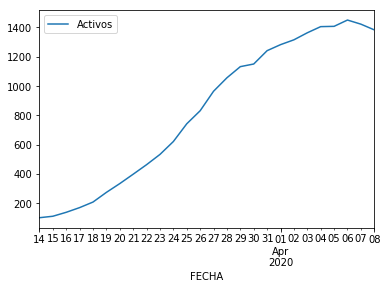

In [30]:
ax = df[(df['Activos']>100) & (df['CCAA']=='CN')].plot(y='Activos')

In [34]:
df[df['Activos'] > 100]['Activos']

FECHA
2020-03-05      137.0
2020-03-06      137.0
2020-03-07      175.0
2020-03-08      453.0
2020-03-08      141.0
               ...   
2020-04-08    16956.0
2020-04-08     1049.0
2020-04-08     2899.0
2020-04-08     4603.0
2020-04-08     1672.0
Name: Activos, Length: 467, dtype: float64

In [35]:
series = df['Activos']

In [36]:
type(series)

pandas.core.series.Series

In [37]:
series.where(series>100)

FECHA
2020-02-20       NaN
2020-02-20       NaN
2020-02-20       NaN
2020-02-20       NaN
2020-02-20       NaN
               ...  
2020-04-08       NaN
2020-04-08    1049.0
2020-04-08    2899.0
2020-04-08    4603.0
2020-04-08    1672.0
Name: Activos, Length: 931, dtype: float64

In [39]:
series.reset_index()['Activos']

0         0.0
1         0.0
2         0.0
3         1.0
4         1.0
        ...  
926      75.0
927    1049.0
928    2899.0
929    4603.0
930    1672.0
Name: Activos, Length: 931, dtype: float64